<a href="https://colab.research.google.com/github/Anurag-Mohan/Amazon-Inventory-Analysis/blob/main/AmazonData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day 1**

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
file_path = '/content/drive/My Drive/Intership-Mini/bestsellers with categories.csv'
df = pd.read_csv(file_path)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [18]:
print(df.info())
print(df.describe())
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None
       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

# **Day 2**

In [19]:
print("Initial DataFrame Info:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None

Missing values per column:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [20]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [21]:
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)

After dropping duplicates: (550, 7)


In [22]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
print("Updated column names:", df.columns.tolist())

Updated column names: ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [23]:
print(df.dtypes)

name            object
author          object
user_rating    float64
reviews          int64
price            int64
year             int64
genre           object
dtype: object


In [24]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [25]:
df.to_csv("/content/drive/My Drive/Intership-Mini/cleaned_amazon_data.csv", index=False)

# **Day 3**

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
df = pd.read_csv("/content/drive/My Drive/Intership-Mini/cleaned_amazon_data.csv")

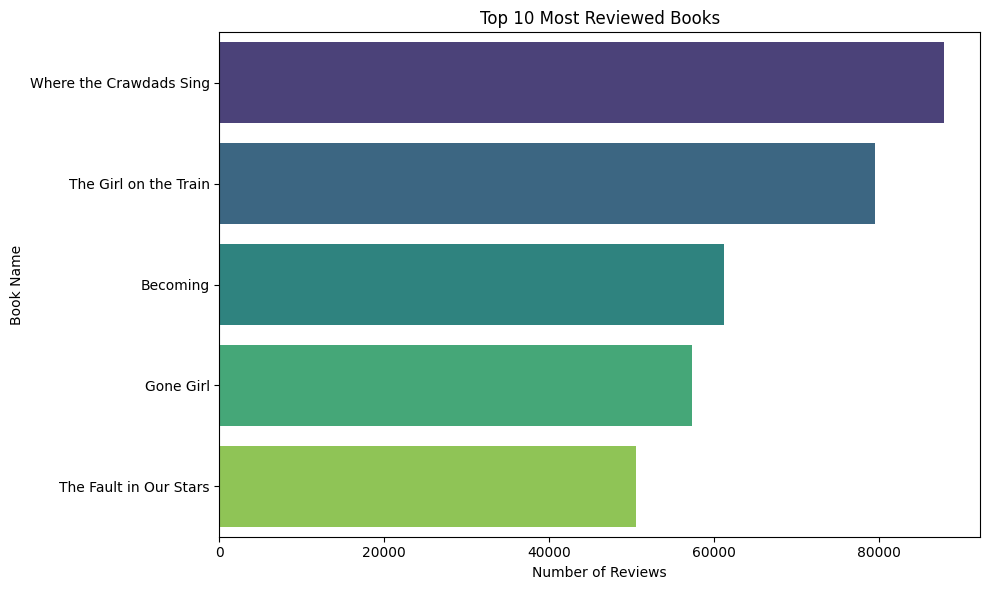

In [28]:
top_books = df.sort_values(by='reviews', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_books, x='reviews', y='name', hue='name', palette='viridis', legend=False)
plt.title("Top 10 Most Reviewed Books")
plt.xlabel("Number of Reviews")
plt.ylabel("Book Name")
plt.tight_layout()
plt.show()

In [29]:
top_rated = df[df['user_rating'] == df['user_rating'].max()]

print("Books with Highest User Rating:")
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 100)
print(top_rated[['name', 'author', 'year','user_rating']])

Books with Highest User Rating:
                                                                                                    name                 author  year  user_rating
40                                                              Brown Bear, Brown Bear, What Do You See?        Bill Martin Jr.  2017          4.9
41                                                              Brown Bear, Brown Bear, What Do You See?        Bill Martin Jr.  2019          4.9
81                              Dog Man and Cat Kid: From the Creator of Captain Underpants (Dog Man #4)             Dav Pilkey  2018          4.9
82                   Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3)             Dav Pilkey  2017          4.9
83                       Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6)             Dav Pilkey  2018          4.9
84                       Dog Man: Brawl of the Wild: From the Creator of Captain Under

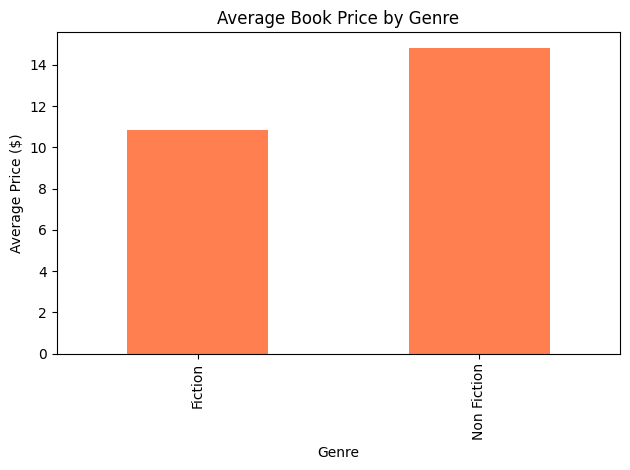

In [30]:
avg_price = df.groupby('genre')['price'].mean()

avg_price.plot(kind='bar', color='coral')
plt.title("Average Book Price by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.show()

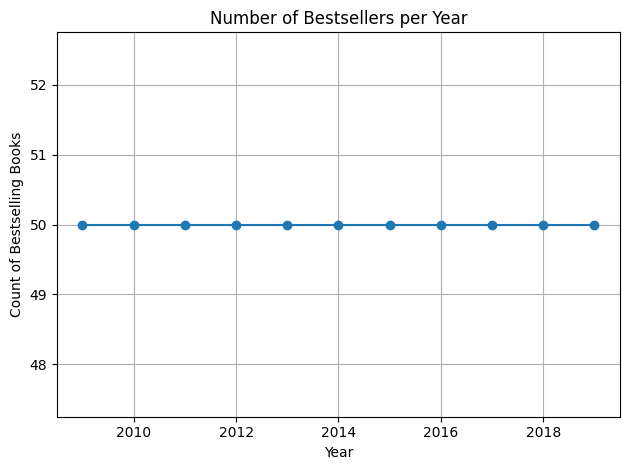

In [31]:
yearly_count = df.groupby('year')['name'].count()

plt.plot(yearly_count.index, yearly_count.values, marker='o')
plt.title("Number of Bestsellers per Year")
plt.xlabel("Year")
plt.ylabel("Count of Bestselling Books")
plt.grid(True)
plt.tight_layout()
plt.show()

This shows that , the dataset is like top 50 bestselling books in each year from 2009 to 2019 so thats why it gives a constant 50 at each year

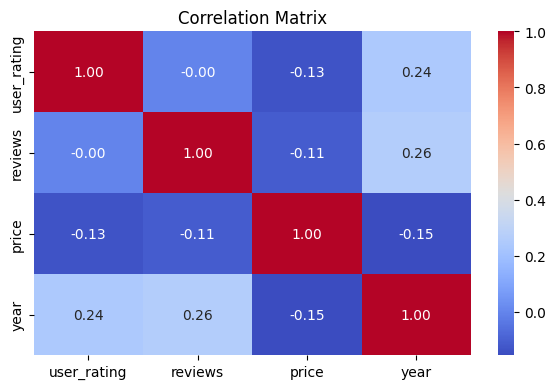

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Here from this correlation matrix its clear that
* **user_rating vs reviews** -0.00 no correlation ( no effect )
* **user_rating vs price** -0.13 slight negative correlation ( higher priced books may hav less rating)
* **user_rating vs year** 0.24 weak positive ( recent books with higher rating )
* **reviews vs price** -0.11 slight negative ( very weak affect of price on review count )
* **review vs year** 0.26 weak positive (recent books getting more review)
* **price vs year** -0.15 slight negative ( almost no effect , price may be dropping per year )






# **Day 4**

In [33]:
df['turnover_rate'] = df['reviews'] / df['price']
df['turnover_rate'] = df['turnover_rate'].replace([np.inf, -np.inf], np.nan).fillna(0)
df.sort_values('turnover_rate', ascending=False).head()

,name,author,user_rating,reviews,price,year,genre,turnover_rate
383,The Girl on the Train,Paula Hawkins,4.1,79446,7.0,2016,Fiction,11349.428571
490,The Wonky Donkey,Craig Smith,4.8,30183,4.0,2018,Fiction,7545.750000
491,The Wonky Donkey,Craig Smith,4.8,30183,4.0,2019,Fiction,7545.750000
367,The Fault in Our Stars,John Green,4.7,50482,7.0,2014,Fiction,7211.714286
137,Gone Girl,Gillian Flynn,4.0,57271,9.0,2014,Fiction,6363.444444


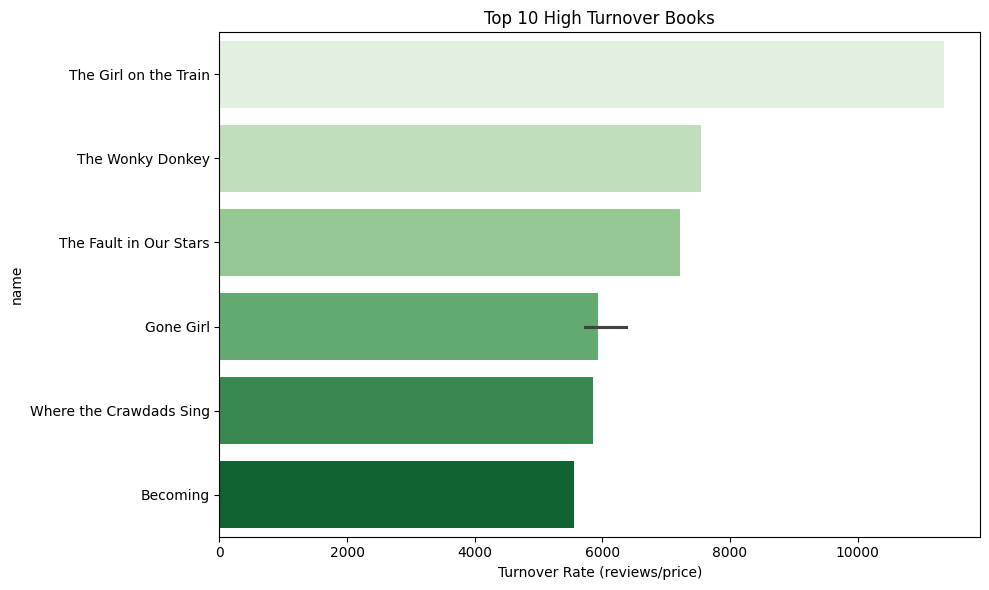

In [34]:
top_turnover = df.sort_values(by='turnover_rate', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_turnover, x='turnover_rate', y='name',hue='name', palette='Greens', legend=False)
plt.title("Top 10 High Turnover Books")
plt.xlabel("Turnover Rate (reviews/price)")
plt.tight_layout()
plt.show()

Top 10 ⏫

In [35]:
def classify_inventory(rate):
    if rate > 100:
        return "Balanced"
    elif rate > 30:
        return "At Risk"
    else:
        return "Underperforming"

df['inventory_status'] = df['turnover_rate'].apply(classify_inventory)
df['inventory_status'].value_counts()

,count
inventory_status,
Balanced,508
At Risk,23
Underperforming,19


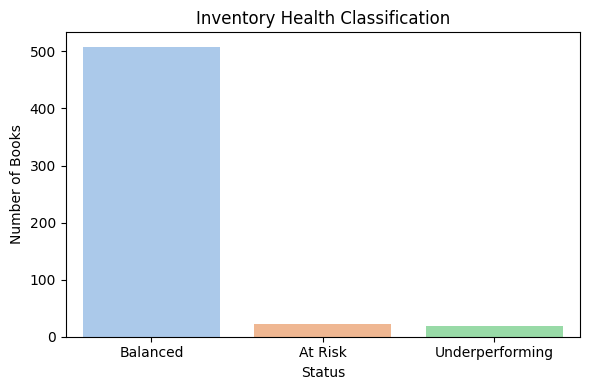

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='inventory_status',hue='inventory_status' ,palette='pastel',legend=False)
plt.title("Inventory Health Classification")
plt.xlabel("Status")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.show()

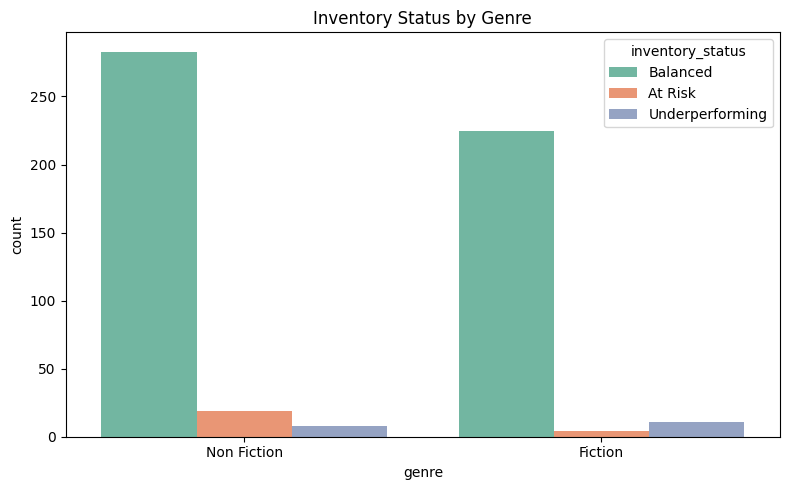

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='genre', hue='inventory_status', palette='Set2')
plt.title("Inventory Status by Genre")
plt.tight_layout()
plt.show()

# **Day 5**

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

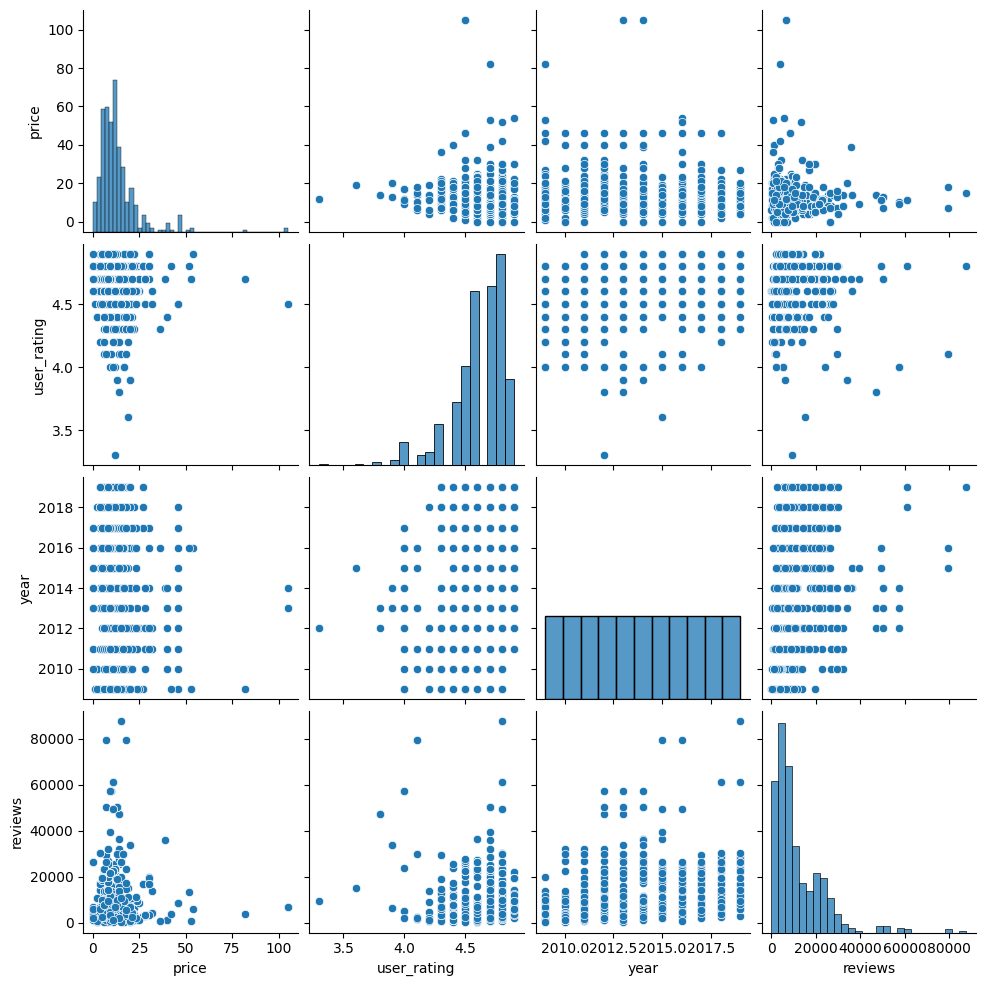

In [63]:
sns.pairplot(df[['price', 'user_rating', 'year', 'reviews', 'genre']])
plt.show()

In [65]:
df['Log_Reviews'] = np.log1p(df['reviews'])
df['Log_Price'] = np.log1p(df['price'])

In [67]:
df['Log_Price'] = df['Log_Price'].clip(upper=df['Log_Price'].quantile(0.99))
df['Log_Reviews'] = df['Log_Reviews'].clip(upper=df['Log_Reviews'].quantile(0.99))
df['Genre_Encoded'] = df['genre'].map({'Fiction': 0, 'Non Fiction': 1})
df['Author_Popularity'] = df['author'].map(df['author'].value_counts())
df['Price_Genre'] = df['Log_Price'] * df['Genre_Encoded']

In [69]:
X = df[['Log_Price', 'user_rating', 'year', 'Genre_Encoded', 'Author_Popularity', 'Price_Genre']]
y = df['Log_Reviews']

In [72]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R² Score:", r2)
print("Mean Squared Error:", mse)
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("Cross-Validated R² (mean):", cv_scores.mean())
print("Cross-Validated R² (std):", cv_scores.std())
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)

R² Score: 0.3259478965902486
Mean Squared Error: 0.8459694666683788
Cross-Validated R² (mean): 0.20715354502870084
Cross-Validated R² (std): 0.10681476219719473

Model Coefficients:
                   Coefficient
Log_Price             0.174215
user_rating           0.001401
year                  0.427414
Genre_Encoded         0.208323
Author_Popularity     0.154814
Price_Genre          -0.554499


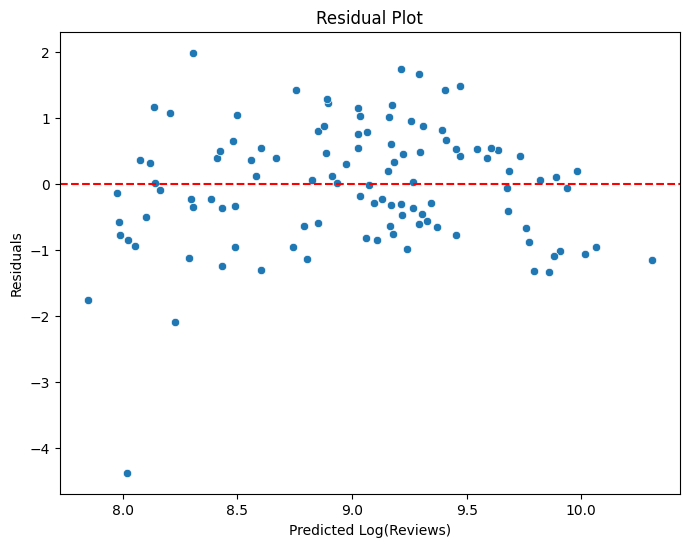

In [78]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Log(Reviews)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [81]:
def predict_reviews(price, user_rating, year, genre, author_popularity):
    log_price = np.log1p(price)
    genre_encoded = 0 if genre.lower() == 'fiction' else 1
    price_genre = log_price * genre_encoded

    input_data = pd.DataFrame({
        'Log_Price': [log_price],
        'user_rating': [user_rating],
        'year': [year],
        'Genre_Encoded': [genre_encoded],
        'Author_Popularity': [author_popularity],
        'Price_Genre': [price_genre]
    })

    input_scaled = scaler.transform(input_data)

    log_reviews_pred = model.predict(input_scaled)[0]
    reviews_pred = int(np.expm1(log_reviews_pred))

    return reviews_pred

predicted_reviews = predict_reviews(
    price=15,
    user_rating=4.5,
    year=2020,
    genre='Fiction',
    author_popularity=5,
)

print("\nPredicted Number of Reviews for the New Book:", predicted_reviews)


Predicted Number of Reviews for the New Book: 28312
